# Preparation and Data

In [186]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
import pandas as pd


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


housing = pd.read_csv("Datasets/housing.csv")
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


housing_with_index = housing.reset_index()
housing_with_index

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


# Description of Data

In [187]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [188]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [189]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Histogram plots of numerical attributes

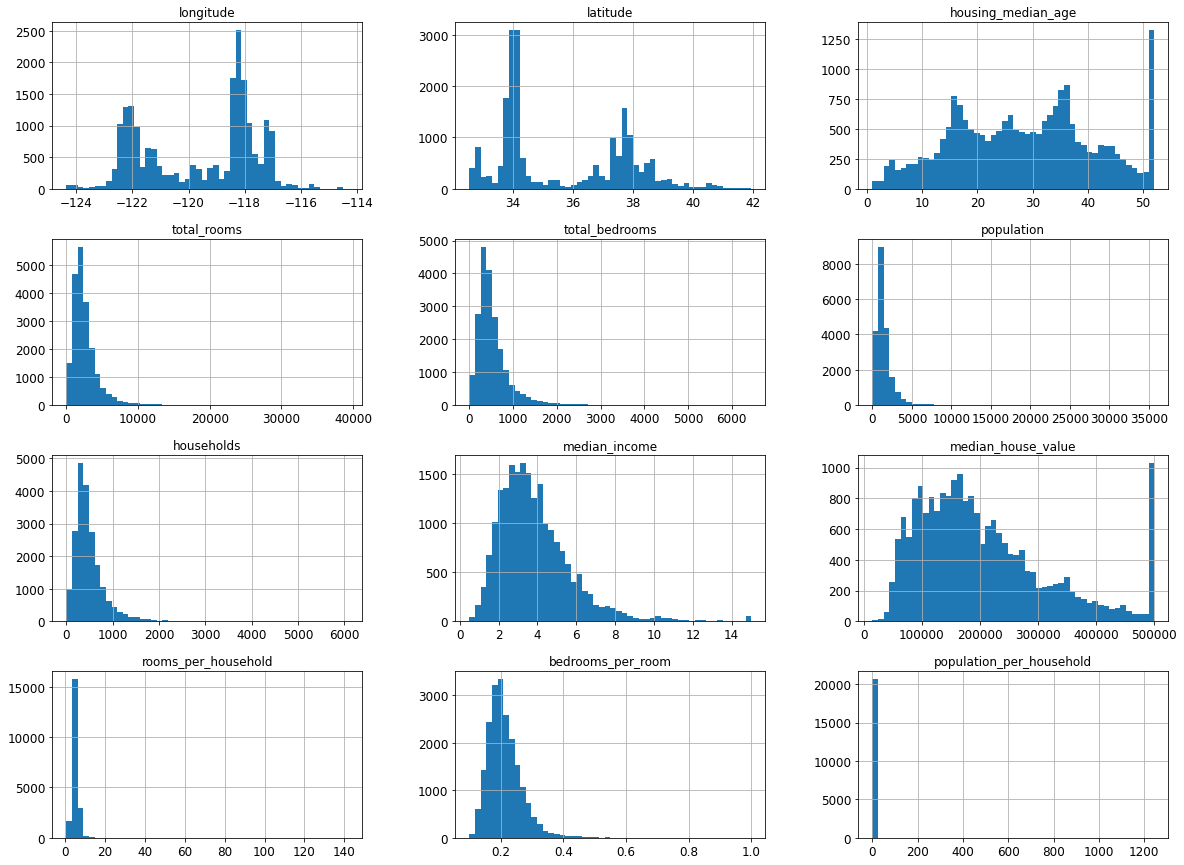

In [190]:
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))
plt.show()

## Note: Median_Income is in 10000s Also may need to transform the tail heavy features

## Creating a training and test sets

In [191]:
import Utils as utils
train_set,test_set = utils.train_test_maker(housing_with_index,0.2)

In [192]:
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.192899,2.128405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


### Note: sklearn.model_selection.train_test_split can also be used

In [193]:
a = utils.stratum_maker(housing_with_index,"median_income","income_cat",bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

In [194]:
a

0        (6.0, inf]
1        (6.0, inf]
2        (6.0, inf]
3        (4.5, 6.0]
4        (3.0, 4.5]
            ...    
20635    (1.5, 3.0]
20636    (1.5, 3.0]
20637    (1.5, 3.0]
20638    (1.5, 3.0]
20639    (1.5, 3.0]
Name: income_cat, Length: 20640, dtype: category
Categories (5, interval[float64, right]): [(0.0, 1.5] < (1.5, 3.0] < (3.0, 4.5] < (4.5, 6.0] < (6.0, inf]]

<AxesSubplot:>

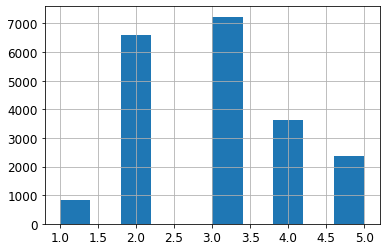

In [195]:
pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5]).hist()

### train and test set should be representative of the median_income feature since it is decided to be an important feature

In [196]:
test_set_strat , train_set_strat = utils.stratified_shuffled_sampling(housing_with_index,"median_income","income_cat",
                                                                     [0., 1.5, 3.0, 4.5, 6., np.inf],[1, 2, 3, 4, 5],1,0.2)
    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass test_size=0.2, train_size=42 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [197]:
test_set_strat

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,income_cat
8378,8378,-118.35,33.95,42.0,1779.0,431.0,1507.0,380.0,2.8892,159800.0,<1H OCEAN,4.681579,0.242271,3.965789,"(1.5, 3.0]"
17980,17980,-121.94,37.31,30.0,4238.0,1010.0,1914.0,972.0,3.7632,307000.0,<1H OCEAN,4.360082,0.238320,1.969136,"(3.0, 4.5]"
20121,20121,-120.45,37.79,8.0,2687.0,495.0,5087.0,385.0,3.1719,115400.0,INLAND,6.979221,0.184220,13.212987,"(3.0, 4.5]"
17020,17020,-122.30,37.51,35.0,2789.0,445.0,1156.0,404.0,5.4322,391000.0,NEAR OCEAN,6.903465,0.159555,2.861386,"(4.5, 6.0]"
10242,10242,-117.87,33.89,25.0,1142.0,162.0,486.0,150.0,7.1472,270100.0,<1H OCEAN,7.613333,0.141856,3.240000,"(6.0, inf]"
2398,2398,-118.91,36.79,19.0,1616.0,324.0,187.0,80.0,3.7857,78600.0,INLAND,20.200000,0.200495,2.337500,"(3.0, 4.5]"
5419,5419,-118.43,34.02,38.0,2172.0,437.0,830.0,368.0,3.9091,500001.0,<1H OCEAN,5.902174,0.201197,2.255435,"(3.0, 4.5]"
15839,15839,-122.43,37.75,52.0,3521.0,767.0,1415.0,687.0,4.8750,362200.0,NEAR BAY,5.125182,0.217836,2.059680,"(4.5, 6.0]"
19044,19044,-121.81,38.45,24.0,1951.0,341.0,1140.0,338.0,3.7061,128500.0,INLAND,5.772189,0.174782,3.372781,"(3.0, 4.5]"
16277,16277,-121.26,37.94,43.0,1610.0,412.0,1409.0,365.0,1.7574,51700.0,INLAND,4.410959,0.255901,3.860274,"(1.5, 3.0]"


In [198]:
test_set_strat["income_cat"].value_counts()/len(test_set_strat)

(3.0, 4.5]    0.357143
(1.5, 3.0]    0.309524
(4.5, 6.0]    0.166667
(6.0, inf]    0.119048
(0.0, 1.5]    0.047619
Name: income_cat, dtype: float64

In [ ]:
for set_ in (train_set_strat,test_set_strat):
    set_.drop("income_cat",axis=1,inplace=True)

In [ ]:
test_set_strat

### Always a good practice to work on a copy of training set

In [ ]:
housing_train = train_set_strat.copy()

In [ ]:
housing_train.plot(kind="scatter",x="longitude",y="latitude",alpha=0.3,
                  s = housing_train["population"]/100,label="Population",figsize=(10,7),
                  c = "median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

### from the above it seems that housing prices are related to population and location

#### Correlation between features

In [ ]:
corr_matrix = housing_train.corr()

In [204]:
corr_matrix

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
index,1.000000,-0.125820,0.084370,-0.149435,0.040264,0.010685,0.014629,0.009492,0.076829,0.083267,0.080094,-0.111317,0.026710
longitude,-0.125820,1.000000,-0.927043,-0.136950,0.032456,0.062306,0.079419,0.045521,-0.039099,-0.047929,-0.035447,0.102101,-0.013428
latitude,0.084370,-0.927043,1.000000,0.044946,-0.019032,-0.053906,-0.082988,-0.052898,-0.060073,-0.144122,0.111363,-0.120354,0.011191
housing_median_age,-0.149435,-0.136950,0.044946,1.000000,-0.353275,-0.309514,-0.294007,-0.301514,-0.127081,0.111326,-0.160160,0.140897,0.024619
total_rooms,0.040264,0.032456,-0.019032,-0.353275,1.000000,0.935707,0.858969,0.929290,0.208134,0.134232,0.158226,-0.204774,-0.029226
total_bedrooms,0.010685,0.062306,-0.053906,-0.309514,0.935707,1.000000,0.871580,0.981010,0.006597,0.057650,0.009281,0.060442,-0.032620
population,0.014629,0.079419,-0.082988,-0.294007,0.858969,0.871580,1.000000,0.901186,0.026299,-0.017742,-0.048329,0.006494,0.108715
households,0.009492,0.045521,-0.052898,-0.301514,0.929290,0.981010,0.901186,1.000000,0.031650,0.074004,-0.060201,0.036236,-0.032639
median_income,0.076829,-0.039099,-0.060073,-0.127081,0.208134,0.006597,0.026299,0.031650,1.000000,0.675718,0.390908,-0.623783,0.046304
median_house_value,0.083267,-0.047929,-0.144122,0.111326,0.134232,0.057650,-0.017742,0.074004,0.675718,1.000000,0.163473,-0.252279,-0.012276


In [205]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.675718
rooms_per_household         0.163473
total_rooms                 0.134232
housing_median_age          0.111326
index                       0.083267
households                  0.074004
total_bedrooms              0.057650
population_per_household   -0.012276
population                 -0.017742
longitude                  -0.047929
latitude                   -0.144122
bedrooms_per_room          -0.252279
Name: median_house_value, dtype: float64

#### based on correlation median_income,rooms_per_household, total_rooms, population_per_household and bedrooms_per_room have highest correlation with median_house_value

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='median_income', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='rooms_per_household'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_inco

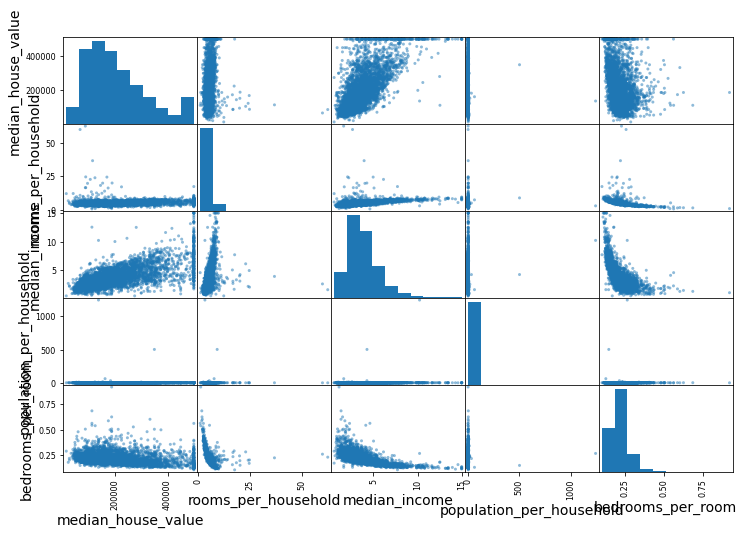

In [206]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","rooms_per_household", "median_income", "population_per_household","bedrooms_per_room"]
scatter_matrix(housing_train[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

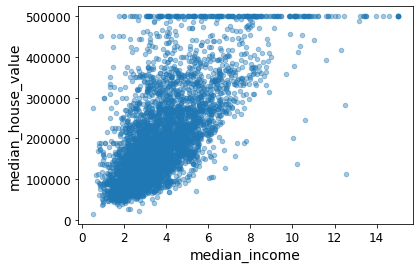

In [207]:
housing_train.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.4)

#### Note horizontal lines at 500k, 450k, 350k (we may need to remove these data) to prevent our algo from reproducing this quirk

In [208]:
housing = train_set_strat.drop("median_house_value",axis=1) # drop() creates a copy of the data and doesn't affect train_set_strat
housing_labels = train_set_strat["median_house_value"].copy()

#### To deal with missing values on individual basis use utils.rectify_missing_vals but in general scikit-learn SimpleImputer can be applied to whole dataset

In [209]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([ 1.03175000e+04, -1.18530000e+02,  3.42700000e+01,  2.90000000e+01,
        2.14400000e+03,  4.37000000e+02,  1.17250000e+03,  4.12000000e+02,
        3.52615000e+00,  5.21154063e+00,  2.04163868e-01,  2.80842719e+00])

In [210]:
X = imputer.transform(housing_num)

In [211]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
housing_tr

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
9741,9741.0,-121.64,36.80,18.0,5915.0,1000.0,2975.0,975.0,4.5812,6.066667,0.169062,3.051282
3678,3678.0,-118.38,34.21,35.0,1468.0,303.0,1295.0,300.0,3.7708,4.893333,0.206403,4.316667
14512,14512.0,-117.16,32.91,5.0,1619.0,272.0,1063.0,296.0,6.0891,5.469595,0.168005,3.591216
19443,19443.0,-121.04,37.68,18.0,5129.0,1171.0,3622.0,1128.0,2.0272,4.546986,0.228310,3.210993
6947,6947.0,-118.08,33.99,37.0,1419.0,310.0,1125.0,296.0,2.5000,4.793919,0.218464,3.800676
...,...,...,...,...,...,...,...,...,...,...,...,...
6602,6602.0,-118.16,34.19,42.0,2076.0,462.0,1641.0,436.0,2.2326,4.761468,0.222543,3.763761
12050,12050.0,-117.58,33.89,14.0,1731.0,404.0,1269.0,351.0,2.3654,4.931624,0.233391,3.615385
18979,18979.0,-122.02,38.25,10.0,2237.0,454.0,1255.0,429.0,3.1176,5.214452,0.202950,2.925408
8519,8519.0,-118.32,33.89,34.0,2675.0,560.0,1270.0,492.0,4.5053,5.436992,0.209346,2.581301


In [212]:
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
9741,<1H OCEAN
3678,<1H OCEAN
14512,<1H OCEAN
19443,INLAND
6947,<1H OCEAN
...,...
6602,<1H OCEAN
12050,INLAND
18979,INLAND
8519,<1H OCEAN


#### we have to convert ocean_proximity from categorical variable to numerical variable

In [213]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]])

In [214]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### in the above encoding two nearby values are not necessarily more similar that two distant values but ML algorithms will assume otherwise therefore it is better to apply one hot encoding

In [215]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<4128x5 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

In [216]:
housing_tr

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
9741,9741.0,-121.64,36.80,18.0,5915.0,1000.0,2975.0,975.0,4.5812,6.066667,0.169062,3.051282
3678,3678.0,-118.38,34.21,35.0,1468.0,303.0,1295.0,300.0,3.7708,4.893333,0.206403,4.316667
14512,14512.0,-117.16,32.91,5.0,1619.0,272.0,1063.0,296.0,6.0891,5.469595,0.168005,3.591216
19443,19443.0,-121.04,37.68,18.0,5129.0,1171.0,3622.0,1128.0,2.0272,4.546986,0.228310,3.210993
6947,6947.0,-118.08,33.99,37.0,1419.0,310.0,1125.0,296.0,2.5000,4.793919,0.218464,3.800676
...,...,...,...,...,...,...,...,...,...,...,...,...
6602,6602.0,-118.16,34.19,42.0,2076.0,462.0,1641.0,436.0,2.2326,4.761468,0.222543,3.763761
12050,12050.0,-117.58,33.89,14.0,1731.0,404.0,1269.0,351.0,2.3654,4.931624,0.233391,3.615385
18979,18979.0,-122.02,38.25,10.0,2237.0,454.0,1255.0,429.0,3.1176,5.214452,0.202950,2.925408
8519,8519.0,-118.32,33.89,34.0,2675.0,560.0,1270.0,492.0,4.5053,5.436992,0.209346,2.581301


#### We can do all the feature engineering using pipeline

In [221]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline for numerical variables
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = "median")),
    ('std_scaler',StandardScaler())
])

In [223]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [224]:
housing_num_tr

array([[-0.10294387, -1.01982558,  0.55811371, ...,  0.34412652,
        -0.78689207, -0.01502597],
       [-1.12006095,  0.59362727, -0.66181953, ..., -0.23527148,
        -0.13071102,  0.04565294],
       [ 0.69742981,  1.19743478, -1.27414124, ...,  0.04928928,
        -0.805462  ,  0.01086546],
       ...,
       [ 1.44680504, -1.20789677,  1.24108792, ..., -0.07670133,
        -0.1913866 , -0.021062  ],
       [-0.30794421,  0.62332273, -0.81254488, ...,  0.03318989,
        -0.07900378, -0.03756295],
       [-1.47151408, -1.18315056,  1.06210157, ...,  1.5133383 ,
        -1.60598981,  0.00216775]])

#### Better option is to use ColumnTransformer from sklearn.compose

In [225]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num",num_pipeline, num_attribs),
    ("cat",OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

#### Now after preprocessing is done let's train a linear regression on the data and try it on some points in training set

In [236]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [237]:
some_points = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
points_prepared = full_pipeline.transform(some_points)
print("Predictions: ",lin_reg.predict(points_prepared))

Predictions:  [247420.52947979 197622.73321033 267584.93070961  82762.92873101
 159125.85682569]


In [238]:
print("Labels: ",list(some_labels))

Labels:  [255200.0, 170600.0, 214600.0, 92700.0, 162000.0]


In [239]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69243.6024186853

#### Now let's compare the result with a decision tree regressor

In [240]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions,housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0